# 第2章 分布

## Setup

导入一些模块，设定数据路径，并且定义一些之后会用到的类和函数

In [1]:
import os
import re
import pandas as pd
import numpy as np
from collections import defaultdict,Counter
from operator import itemgetter 

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import nsfg
import first
import thinkstats2

ROOT_PATH = "."
DATA_PATH = os.path.join(ROOT_PATH,"data")

描述变量的最佳方法之一是列出该变量在数据集中的值，以及每一个值出现的次数。这种描述称为该变量的`分布（distribution）`。

分布最常用的呈现方法是直方图（histogram），即展示每个值的`频数（frequency）`的图形。在这里，频数指一个值出现的次数。

使用Python计算频数的一个有效方法是使用字典，假设有一个值序列t。

In [2]:
t = [1, 2, 2, 3, 5]
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
hist

{1: 1, 2: 2, 3: 1, 5: 1}

执行上面代码，可以得到一个将值映射到频数的字典。此外，也可以使用collections模块中定义的Counter类。结果是一个Counter对象，是字典类的子类。

In [3]:
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

还有一个方法就是上一章pandas方法value_counts()

## 2.1表示直方图

本书自己在thinkstats2.py中创建了一个类Hist,Hist的构造函数参数可以是序列，字典，pandas的Series对象或者另外一个Hist对象，下面代码可以初始化一个Hist对象：

In [4]:
hist = thinkstats2.Hist([1,2,2,3,5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

Hist对象提供Freq方法，其参数是一个值，返回结果是这个值的频数

In [5]:
hist.Freq(2)

2

方括号的操作符也是一样

In [6]:
hist[2]

2

如果传入的参数值在Hist中不存在，频数就是0

In [7]:
hist.Freq(4)

0

The Values method returns the values:

In [8]:
hist.Values()

dict_keys([1, 2, 3, 5])

你可以像下面这样迭代值和频率：

In [9]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


也可以使用Items遍历值-频数对

In [10]:
for val, freq in hist.Items():
    print(val, freq)

1 1
2 2
3 1
5 1


## 绘制直方图

作者编写了thinkplot.py模块，可以提供各种函数用于绘制Hist及文件，这个模块基于matplotlib包的pyplot

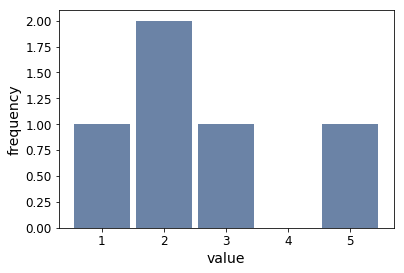

In [11]:
%matplotlib inline
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

## 2.3 美国家庭增长调查中的变量

首先读入数据，选取成功生产的记录。

In [12]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

方括号中的表达式是一个布尔型Series，从DataFrame中选取满足条件的行，返回一个新的DataFrame，接下来要为成功生产记录的birthwgt_lb生成并绘制直方图

众数为[(7.0, 3049)]


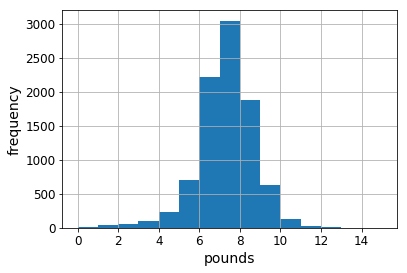

In [13]:
ax = live["birthwgt_lb"].hist(bins=15)
ax.set(xlabel="pounds", ylabel="frequency")

def Mode(content):
    from collections import Counter
    
    counter = Counter(content)
    top_one = counter.most_common(1)
    return top_one
# mode_number = sorted(Counter(live.birthwgt_lb).items(), key=itemgetter(1),reverse=True)[0][0]
mode_number = Mode(live.birthwgt_lb)
print("众数为{}".format(mode_number))

上图中出现最多的值为7磅，这个值称为`众数（mode）`。这个分布大致为钟形。钟形是正态(normal)分布，即高斯(Gaussian)分布的形状。但是结果分布是不对称的，相较右方，尾端（tail）向左延伸更长，这一点与正态分布不符

众数为22.75


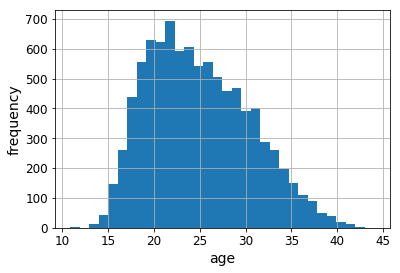

In [14]:
ax = live["agepreg"].hist(bins=32)
ax.set(xlabel="age", ylabel="frequency")
mode_number = sorted(Counter(live.agepreg).items(), key=itemgetter(1),reverse=True)[0][0]
print("众数为{}".format(mode_number))

上图展示了产妇在妊娠结束时的年龄，这一部分众数为21，分布形状大致为钟形，但是尾端向右伸展较长

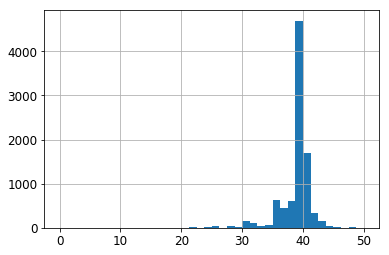

In [15]:
live["prglngth"].hist(bins=40)

上图展示了妊娠周数，图中最长出现的值为39周，这一分布左尾比右尾更长

## 2.4 离群值

再进一步探索之前，我们最好检查一下离群值（outlier）。离群值是极端值，可能是测量和记录中出现的错误，也可能是偶然事件的准确汇报

如下妊娠周数，当妊娠周数超过42周时，大部分医生会建议催产，因此大于42周的数据是令人惊讶的，从医学角度看，大于50周几乎是不可能的

In [16]:
hist = Counter(live.prglngth)
for weeks, freq in sorted(hist.items(),key=itemgetter(0),reverse=True)[:10]:
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


## 2.5 第一胎

我们可以比较第一胎和其他胎的周数分布了

In [17]:
data = live.loc[:,["prglngth", "birthord"]]
data.columns = ["prglngth","group"]
data.group = data.group == 1

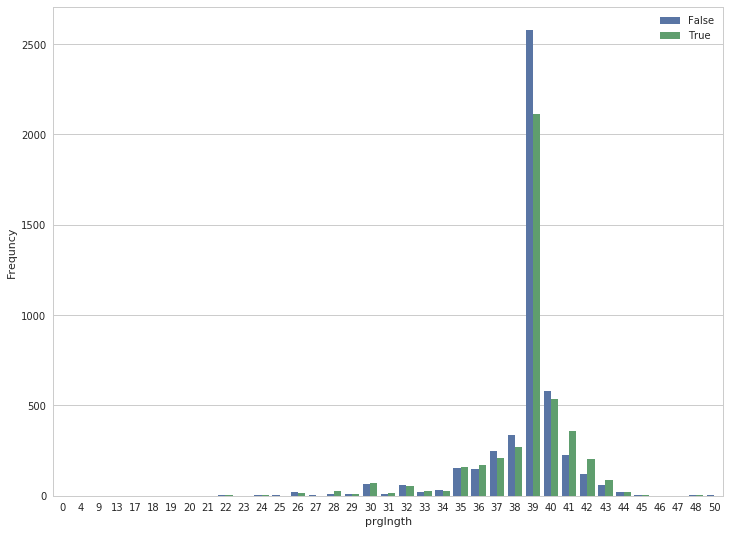

In [18]:
import seaborn as sns
sns.set(style="whitegrid")
#plt.rcParams['axes.labelsize'] = 20
#plt.rcParams['xtick.labelsize'] = 12
#plt.rcParams['ytick.labelsize'] = 20

f, ax = plt.subplots(figsize=(12, 9))

g = sns.countplot(x="prglngth", hue="group", data=data)

ax.set_ylabel('Frequncy')
plt.legend(loc='upper right')

## 2.6 分布概述

* 集中趋势：变量值是否聚集在某个值附近
  
* 众数：是否有多个聚集点
    
* 展布：变量的变化性如何
    
* 尾部：当值偏离众数时，其概率降低多快
    
* 离群值：是否有远离众数的极端值

`汇总统计量（summary statistic）`就是为了回答以上这些问题而设计的。目前最常用的汇总统计量是`均值（mean）`，用于描述分布的`集中趋势（central tendency）`。

$$均值：\overline{X} = \frac{1}{n}\sum_i^nX_i$$

## 2.7 方差

`方差（Variance）`是用于描述一个分布的变化性或展布（spread）的汇总统计量，计算方差的公式为：

$$ S^2 = \frac{1}{n} \sum_i^n(x_i - \overline{x})^2$$

公式中的$x_i-\overline{x}$称为`离差`，因此方差就是离差平方和的均值。方差的平方跟S是`标准差（standard deviation）`。

Pandas数据结构提供计算均值、方差和标准差的方法。

In [19]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

## 2.8 效应量

`效应量（effect size）`是用于描述效应大小的汇总统计量，例如：要描述两个组群之间的差异，一个显而易见的的选择是使用均值的差值（差值除以总计的平均值）。

另一个描述效应量的方法是将群组之间的差值与群组内的变化性进行比较。Cohen's d就是这样的统计量，公式如下：
$$ d = \frac{\overline{x_1} - \overline{x_2}}{s}, s = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}$$

其中$\overline{x_1} 和 \overline{x_2}$是各群组的均值，s是`合并标准差（pooled standard deviation）`，python代码如下：

In [20]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [24]:
firsts = live.prglngth[live.birthord == 1]
others = live.prglngth[live.birthord != 1]
CohenEffectSize(firsts, others)

0.028879044654449834